# Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV

# Problem Statement

# Data Gathering

In [2]:
df=pd.read_csv("bank_data.csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot:>

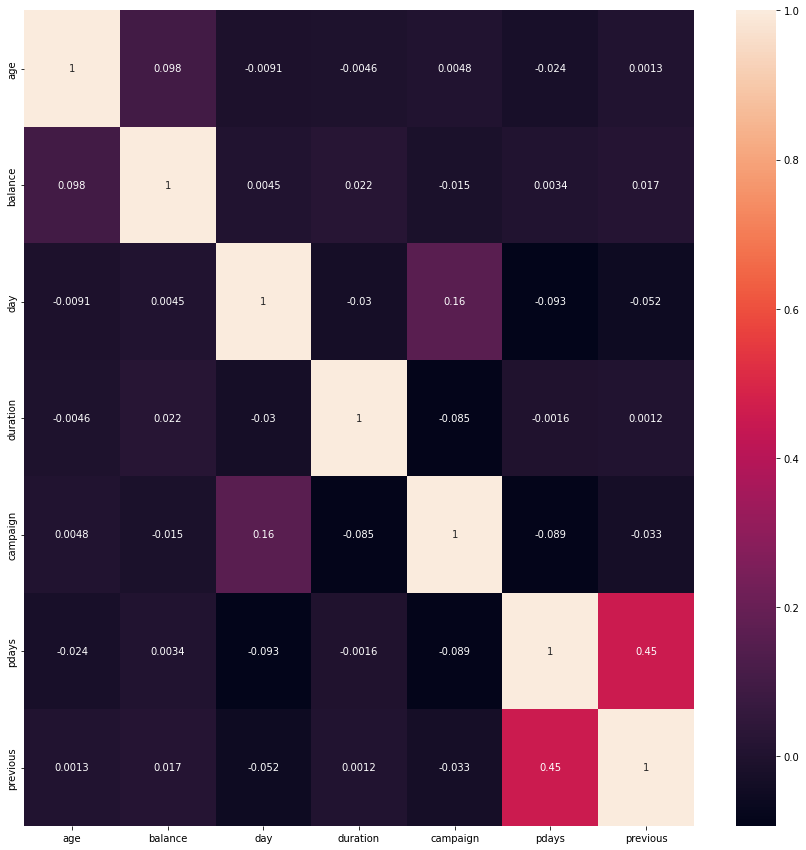

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [8]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

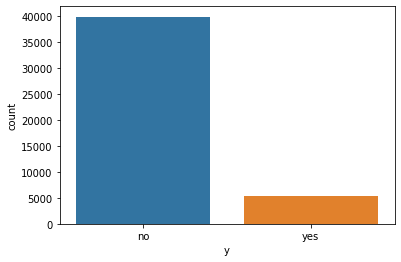

In [9]:
sns.countplot(df["y"])

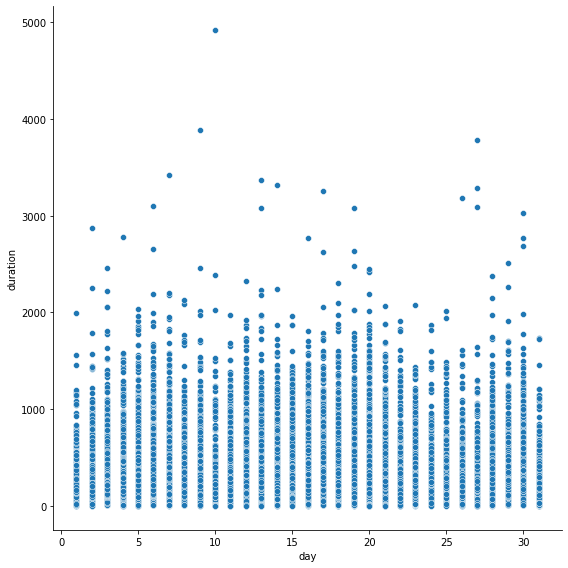

In [10]:
sns.pairplot(df,x_vars="day",y_vars="duration",size=8)

<AxesSubplot:xlabel='previous', ylabel='pdays'>

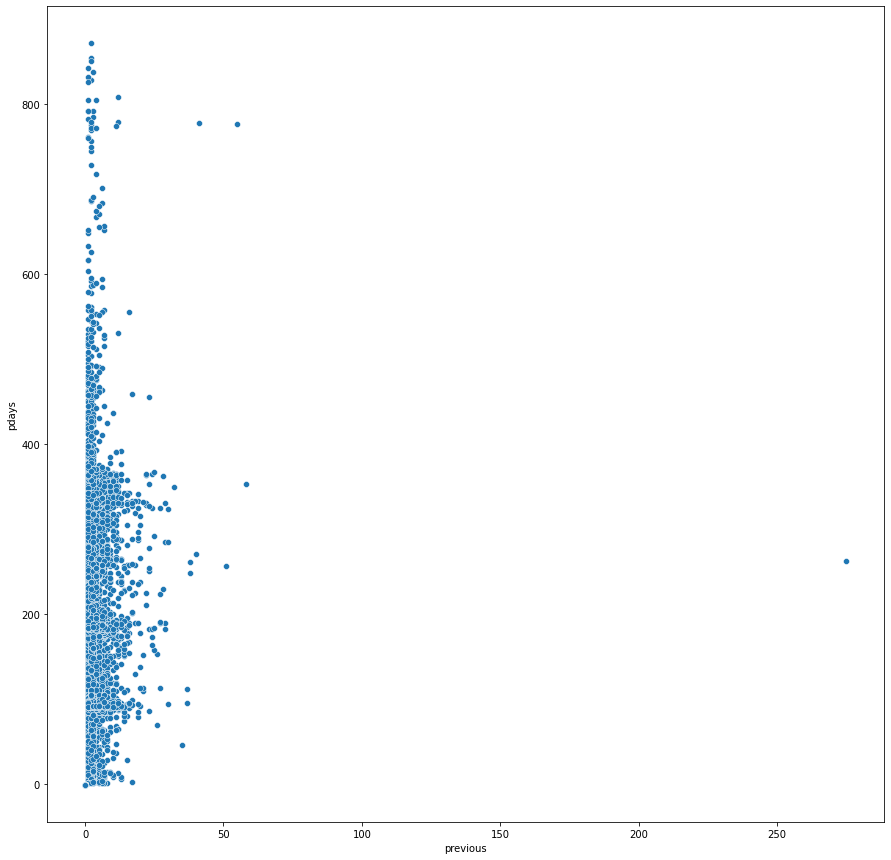

In [11]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=df["previous"],y=df["pdays"])

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

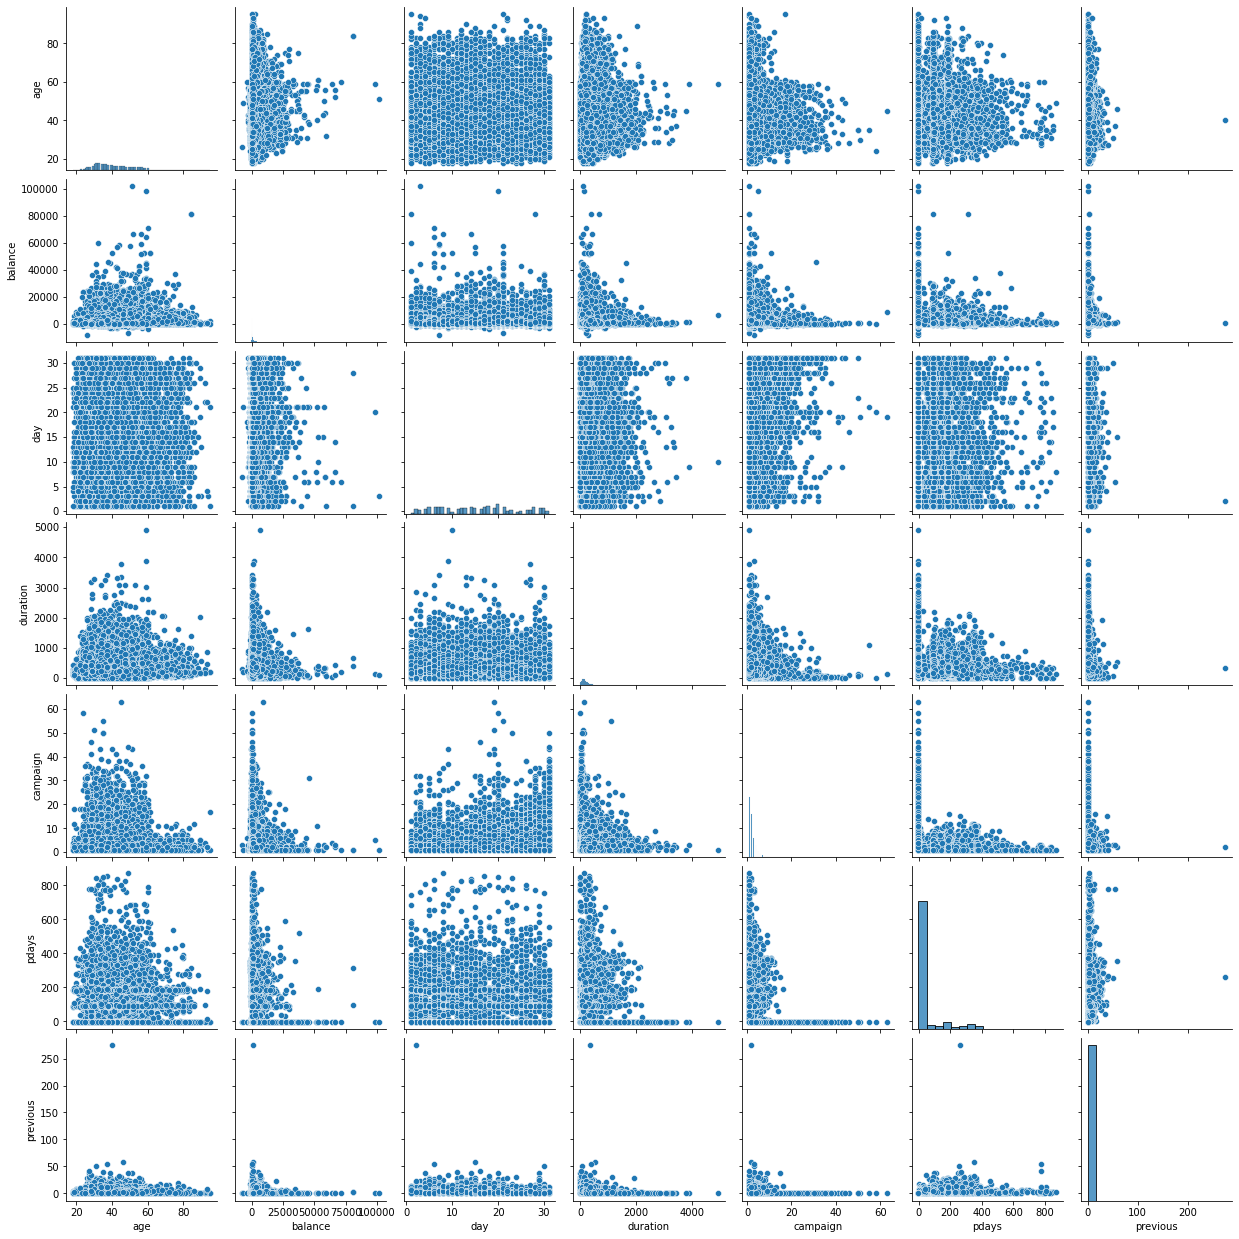

In [13]:
sns.pairplot(df)

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
c

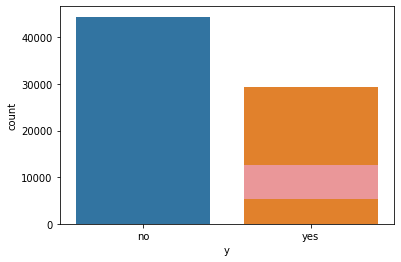

In [14]:
for i in df.columns:
    print(df[i].value_counts())
    sns.countplot(df[i])

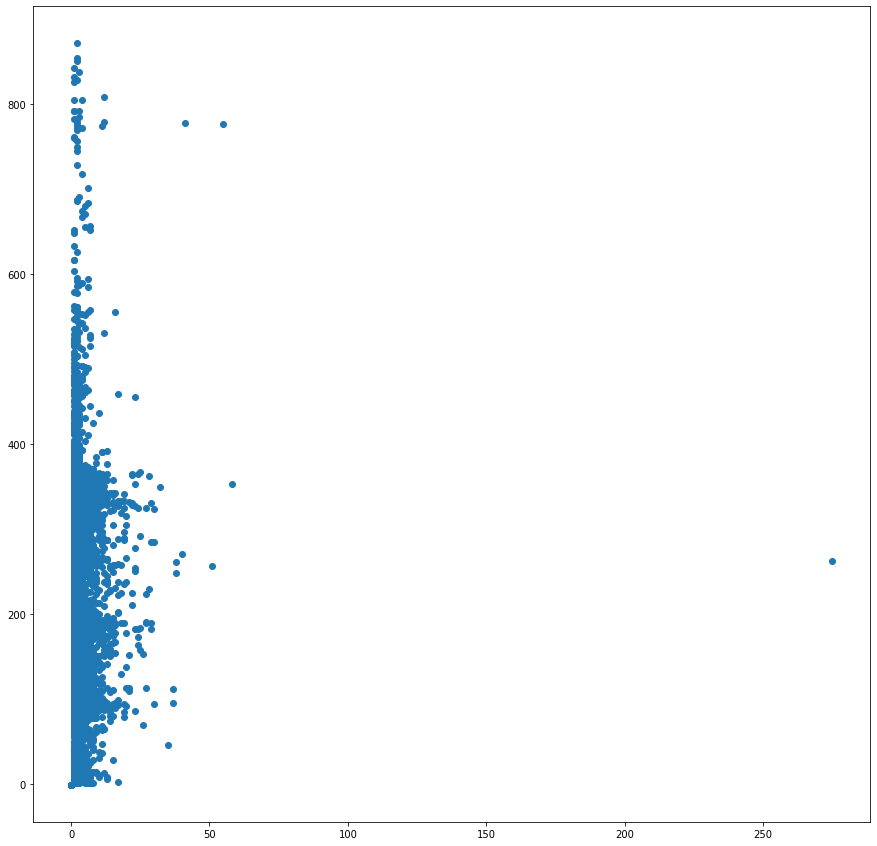

In [15]:
plt.figure(figsize=(15,15))
plt.scatter(x=df["previous"],y=df["pdays"])

<AxesSubplot:>

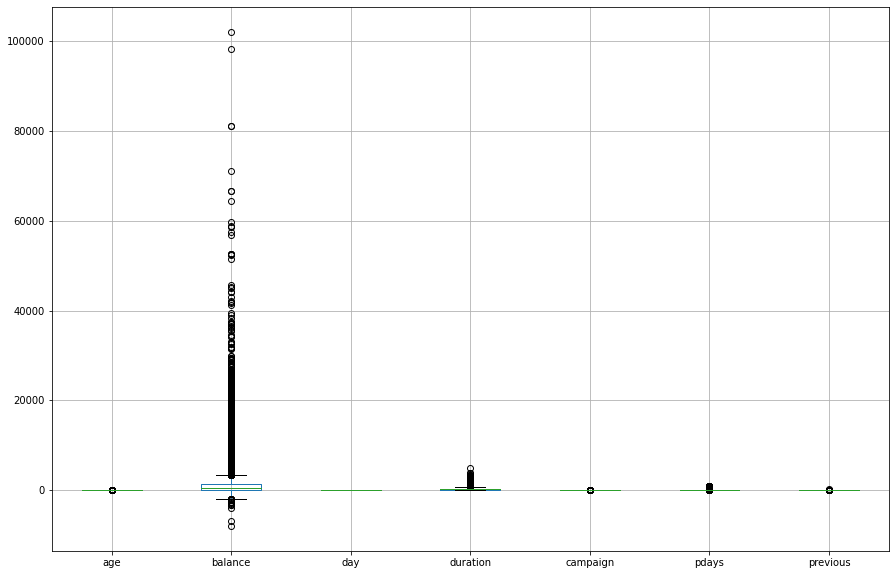

In [16]:
df.boxplot(figsize=(15,10))

In [17]:
df.loc[df["balance"]<0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no


# Feature Engineering

In [18]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [19]:
df=pd.get_dummies(df,columns=["job"])

In [20]:
df=pd.get_dummies(df,columns=["marital"])

In [21]:
label=LabelEncoder()
df["education"]=label.fit_transform(df["education"])

In [22]:
df["education"].value_counts()

1    23202
2    13301
0     6851
3     1857
Name: education, dtype: int64

In [23]:
df["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [24]:
df["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [25]:
df["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [26]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [27]:
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [28]:
df["month"].value_counts().to_dict()

{'may': 13766,
 'jul': 6895,
 'aug': 6247,
 'jun': 5341,
 'nov': 3970,
 'apr': 2932,
 'feb': 2649,
 'jan': 1403,
 'oct': 738,
 'sep': 579,
 'mar': 477,
 'dec': 214}

In [29]:
df["default"]=df["default"].replace({"no":0,"yes":1})
df["housing"]=df["housing"].replace({"no":0,"yes":1})
df["loan"]=df["loan"].replace({"no":0,"yes":1})
df["y"]=df["y"].replace({"no":0,"yes":1})
df["month"]=df["month"].replace({'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'feb':2,'jan':1,'oct':10,'sep':9,'mar':3,'dec':12})

In [30]:
df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [31]:
df=pd.get_dummies(df,columns=["poutcome"])

In [32]:
df=df.drop("contact",axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   education          45211 non-null  int32
 2   default            45211 non-null  int64
 3   balance            45211 non-null  int64
 4   housing            45211 non-null  int64
 5   loan               45211 non-null  int64
 6   day                45211 non-null  int64
 7   month              45211 non-null  int64
 8   duration           45211 non-null  int64
 9   campaign           45211 non-null  int64
 10  pdays              45211 non-null  int64
 11  previous           45211 non-null  int64
 12  y                  45211 non-null  int64
 13  job_admin.         45211 non-null  uint8
 14  job_blue-collar    45211 non-null  uint8
 15  job_entrepreneur   45211 non-null  uint8
 16  job_housemaid      45211 non-null  uint8
 17  job_manageme

# Feature selection

In [34]:
X=df.drop("y",axis=1)
y=df["y"]

In [35]:
from sklearn.feature_selection import mutual_info_classif

<AxesSubplot:>

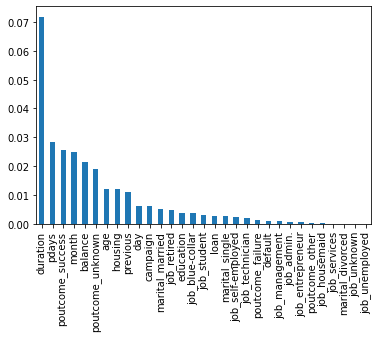

In [36]:
IG = mutual_info_classif(X,y)
IGS = pd.Series(IG, index=X.columns)
IGS.sort_values(ascending=False).plot(kind='bar')

In [37]:
from sklearn.feature_selection import VarianceThreshold

In [38]:
X.var().sort_values(ascending=False)

balance              9.270599e+06
duration             6.632057e+04
pdays                1.002577e+04
age                  1.127581e+02
day                  6.926361e+01
campaign             9.597733e+00
month                5.798628e+00
previous             5.305841e+00
education            5.595002e-01
housing              2.468876e-01
marital_married      2.396149e-01
marital_single       2.028702e-01
job_blue-collar      1.689254e-01
job_management       1.654372e-01
poutcome_unknown     1.492110e-01
job_technician       1.398019e-01
loan                 1.345569e-01
marital_divorced     1.019090e-01
job_admin.           1.012955e-01
poutcome_failure     9.665379e-02
job_services         8.344015e-02
job_retired          4.756972e-02
poutcome_other       3.904259e-02
job_self-employed    3.370611e-02
poutcome_success     3.230482e-02
job_entrepreneur     3.180916e-02
job_unemployed       2.799042e-02
job_housemaid        2.667531e-02
job_student          2.031717e-02
default       

In [39]:
th=VarianceThreshold(threshold=0.05)
th.fit_transform(X,y)
th.get_feature_names_out()

array(['age', 'education', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_management', 'job_services',
       'job_technician', 'marital_divorced', 'marital_married',
       'marital_single', 'poutcome_failure', 'poutcome_unknown'],
      dtype=object)

In [40]:
from sklearn.feature_selection import f_classif

<AxesSubplot:>

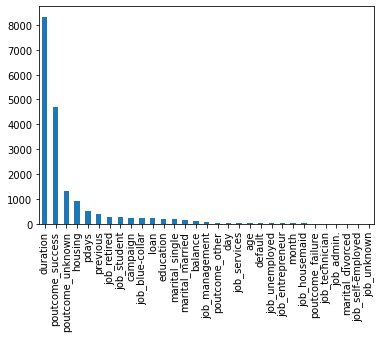

In [41]:
anova,p=f_classif(X,y)

anova1=pd.Series(anova,index=X.columns)
anova1.sort_values(ascending=False).plot(kind='bar')

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
vif=[variance_inflation_factor(X.values,index) for index in range(len(X.columns))]

In [44]:
pd.Series(vif,index=X.columns)

age                  1.648593
education            1.428288
default              1.013482
balance              1.039969
housing              1.167664
loan                 1.029806
day                  1.044046
month                1.082571
duration             1.012605
campaign             1.050255
pdays                4.513486
previous             1.412601
job_admin.                inf
job_blue-collar           inf
job_entrepreneur          inf
job_housemaid             inf
job_management            inf
job_retired               inf
job_self-employed         inf
job_services              inf
job_student               inf
job_technician            inf
job_unemployed            inf
job_unknown               inf
marital_divorced          inf
marital_married           inf
marital_single            inf
poutcome_failure          inf
poutcome_other            inf
poutcome_success          inf
poutcome_unknown          inf
dtype: float64

# Model Training

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
smt=SMOTE(sampling_strategy=0.90,k_neighbors=5,random_state=5)
X_smt,y_smt=smt.fit_resample(X,y)

In [47]:
X_smt.shape,y_smt.shape

((75851, 31), (75851,))

In [48]:
y_smt.value_counts()

0    39922
1    35929
Name: y, dtype: int64

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X_smt,y_smt,random_state=5)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((56888, 31), (18963, 31), (56888,), (18963,))

##### KNN classification 

In [50]:
def evalution(m,x_actual,y_actual):
    pred=m.predict(x_actual)
    cm=confusion_matrix(y_actual,pred)
    print(cm)
    cr=classification_report(y_actual,pred)
    print(cr)
    acc=accuracy_score(y_actual,pred)
    print(acc)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

<AxesSubplot:xlabel='education', ylabel='Density'>

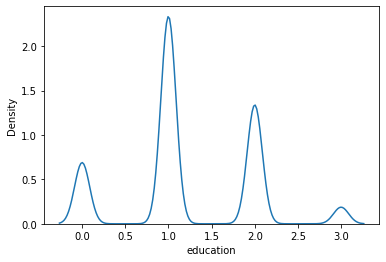

In [53]:
sns.kdeplot(df['education'])

<AxesSubplot:xlabel='age', ylabel='Density'>

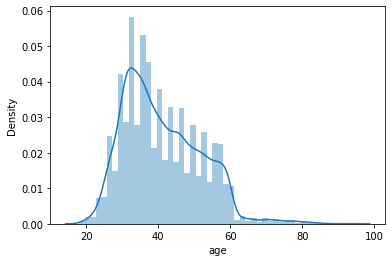

In [54]:
sns.distplot(df['age'],kde=True,hist=True)

<AxesSubplot:xlabel='default', ylabel='Density'>

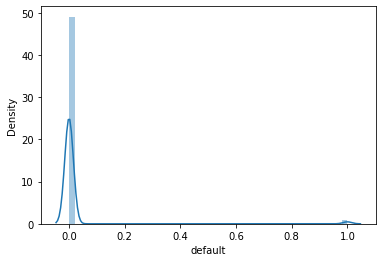

In [55]:
sns.distplot(df['default'],kde=True,hist=True)

<AxesSubplot:xlabel='balance', ylabel='Density'>

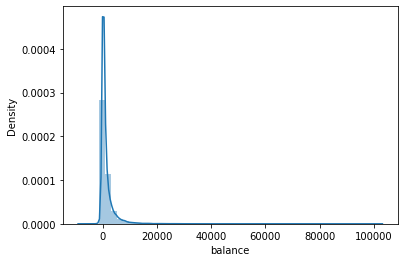

In [56]:
sns.distplot(df['balance'],kde=True,hist=True)

<AxesSubplot:xlabel='duration', ylabel='Density'>

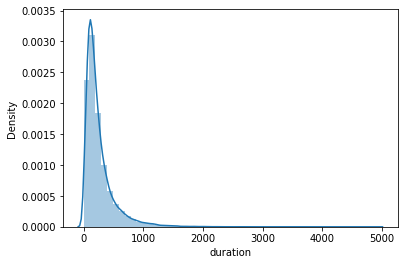

In [57]:
sns.distplot(df['duration'],kde=True,hist=True)

<AxesSubplot:xlabel='campaign', ylabel='Density'>

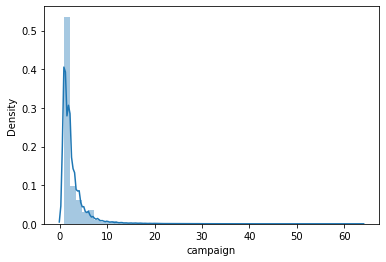

In [58]:
sns.distplot(df['campaign'],kde=True,hist=True)

In [59]:
std=StandardScaler()
stand_xtr=std.fit_transform(x_train)
df_train=pd.DataFrame(stand_xtr,columns=x_train.columns)

In [60]:
stand_xte=std.transform(x_test)
df_test=pd.DataFrame(stand_xte,columns=x_test.columns)

In [61]:
knn_algo=KNeighborsClassifier()

In [63]:
hyp={"n_neighbors":np.arange(2,8),"p":[1,2]}
rmcv=RandomizedSearchCV(knn_algo,hyp,cv=5,random_state=5)
rmcv.fit(df_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([2, 3, 4, 5, 6, 7]),
                                        'p': [1, 2]},
                   random_state=5)

In [64]:
rmcv.best_params_

{'p': 1, 'n_neighbors': 3}

In [65]:
knn_hyp=KNeighborsClassifier(n_neighbors=3,p=1)
knn_hyp.fit(df_train,y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [66]:
evalution(knn_hyp,df_train,y_train)

[[29141   713]
 [ 1591 25443]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     29854
           1       0.97      0.94      0.96     27034

    accuracy                           0.96     56888
   macro avg       0.96      0.96      0.96     56888
weighted avg       0.96      0.96      0.96     56888

0.9594993671776122


In [67]:
evalution(knn_hyp,df_test,y_test)

[[9603  465]
 [ 877 8018]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     10068
           1       0.95      0.90      0.92      8895

    accuracy                           0.93     18963
   macro avg       0.93      0.93      0.93     18963
weighted avg       0.93      0.93      0.93     18963

0.9292306069714708


In [68]:
import pickle
with open("knn_model.pickle","wb") as f:
    pickle.dump(knn_hyp,f)

In [73]:
a=list(x_train.columns)
columns={"column":a}
columns

{'column': ['age',
  'education',
  'default',
  'balance',
  'housing',
  'loan',
  'day',
  'month',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'job_admin.',
  'job_blue-collar',
  'job_entrepreneur',
  'job_housemaid',
  'job_management',
  'job_retired',
  'job_self-employed',
  'job_services',
  'job_student',
  'job_technician',
  'job_unemployed',
  'job_unknown',
  'marital_divorced',
  'marital_married',
  'marital_single',
  'poutcome_failure',
  'poutcome_other',
  'poutcome_success',
  'poutcome_unknown']}

In [74]:
import json
with open("columns_list.json","w") as f:
    json.dump(columns,f)